In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# On charge
df = pd.read_csv('../data/creditcard.csv')

# On sépare Features (X) et Target (y)
X = df.drop('Class', axis=1)
y = df['Class']

print(f"Distribution Originale : {Counter(y)}")
# Résultat attendu : {0: 284315, 1: 492} -> Énorme déséquilibre

Distribution Originale : Counter({0: 284315, 1: 492})


In [8]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter # On réimporte pour être sûr

# 1. Initialisation
rus = RandomUnderSampler(random_state=42)

# 2. Resampling
X_rus, y_rus = rus.fit_resample(X, y)
# 3. Affichage
print("--- Undersampling ---")
print(f"Avant : {Counter(y)}")
print(f"Après : {Counter(y_rus)}")

--- Undersampling ---
Avant : Counter({0: 284315, 1: 492})
Après : Counter({0: 492, 1: 492})


In [7]:
from imblearn.over_sampling import SMOTE

# 1. Initialisation
smote = SMOTE(random_state=42)

# 2. Resampling (Création de fausses fraudes crédibles)
X_smote, y_smote = smote.fit_resample(X, y)
# 3. Affichage
print("--- SMOTE (Oversampling) ---")
print(f"Avant : {Counter(y)}")
print(f"Après : {Counter(y_smote)}")

--- SMOTE (Oversampling) ---
Avant : Counter({0: 284315, 1: 492})
Après : Counter({0: 284315, 1: 284315})


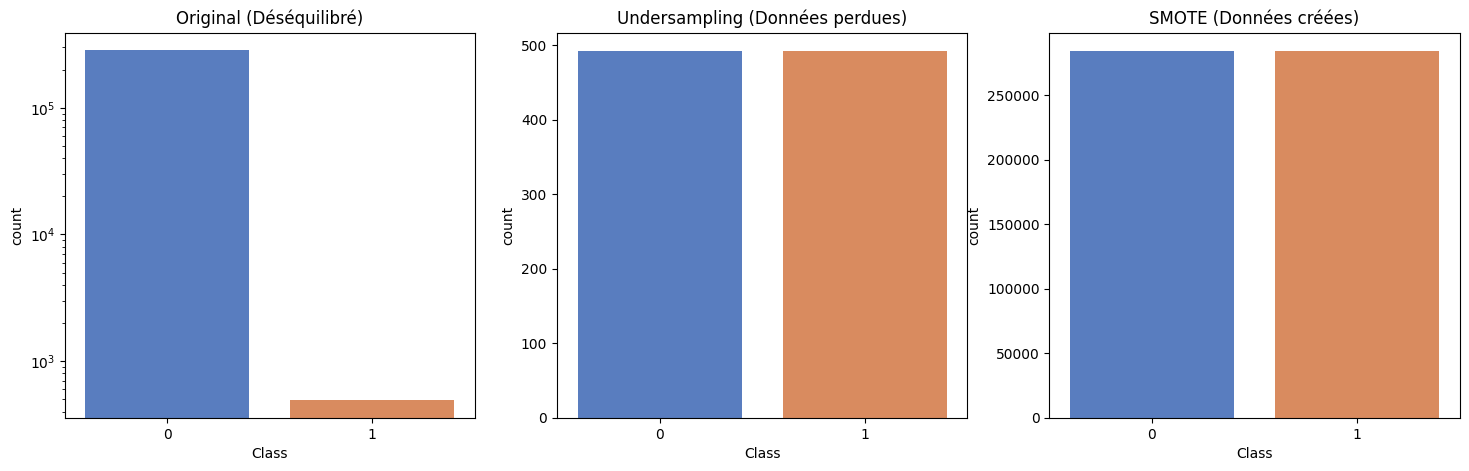

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Original
sns.countplot(x=y, ax=axes[0], hue=y, palette="muted", legend=False)
axes[0].set_title("Original (Déséquilibré)")
axes[0].set_yscale('log')

# 2. Undersampling
sns.countplot(x=y_rus, ax=axes[1], hue=y_rus, palette="muted", legend=False)
axes[1].set_title("Undersampling (Données perdues)")

# 3. SMOTE
sns.countplot(x=y_smote, ax=axes[2], hue=y_smote, palette="muted", legend=False)
axes[2].set_title("SMOTE (Données créées)")

plt.show()